In [513]:
import numpy as np
from scipy import optimize
from scipy.linalg import toeplitz
import matplotlib.pyplot as plt

%matplotlib inline

## 1. Solving Underdetermined Problems

### Part a

In [514]:
def phi(x, p):
    return np.sum(np.power(np.abs(x), p))

### Part b

In [515]:
def solve1(p):
    
    A = np.array([[1, 2]])
    b = 5
    cons = (
        {
            'type': 'eq',
            'fun': lambda x: A @ x - b
        })
    res = optimize.minimize(phi, np.zeros((A.shape[1],)), args=(p),
               constraints=cons, method='SLSQP', options={'disp': False})
    
    return res.x, phi(res.x, p)

### Part c, d

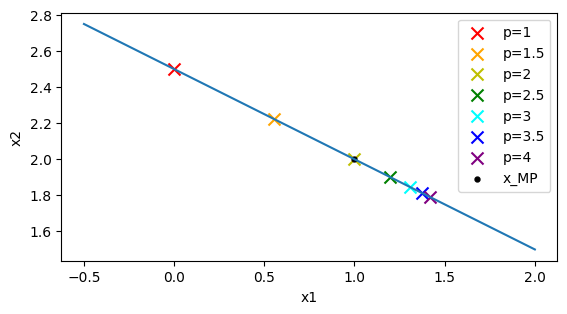

In [516]:
x1 = np.linspace(-0.5, 2., num=2)
x2 = (5. - x1) / 2.
plt.plot(x1, x2)
plt.xlabel('x1')
plt.ylabel('x2')
ax = plt.gca()
ax.set_aspect(1)

x_hat, phi_hat = solve1(1)
x, y = x_hat
plt.scatter(x, y, s=75, label='p=1', c='red', marker='x')

x_hat, phi_hat = solve1(1.5)
x, y = x_hat
plt.scatter(x, y, s=75, label='p=1.5', c='orange', marker='x')

x_hat, phi_hat = solve1(2)
x, y = x_hat
plt.scatter(x, y, s=75, label='p=2', c='y', marker='x')

x_hat, phi_hat = solve1(2.5)
x, y = x_hat
plt.scatter(x, y, s=75, label='p=2.5', c='green', marker='x')

x_hat, phi_hat = solve1(3)
x, y = x_hat
plt.scatter(x, y, s=75, label='p=3', c='cyan', marker='x')

x_hat, phi_hat = solve1(3.5)
x, y = x_hat
plt.scatter(x, y, s=75, label='p=3.5', c='blue', marker='x')

x_hat, phi_hat = solve1(4)
x, y = x_hat
plt.scatter(x, y, s=75, label='p=4', c='purple', marker='x')

A = np.array([[1, 2]])
b = np.array([[5]])
x_mp = A.T @ np.linalg.inv(A @ A.T) @ b
x, y = x_mp
plt.scatter(x, y, s=50, label='x_MP', c='black', marker='.')

plt.legend()
plt.show()

## 2. Singular Value Decomposition

### Part a

In [517]:
def spatial_grid(n):
    return np.linspace(-1., 1., num=n)

### Part b

In [518]:
def gaussian_func(x, n, mu=0., sig=0.2):
    delta_n = 2. / (n - 1)
    return delta_n / np.sqrt(2 * np.pi) / sig * np.exp(-(x - mu) * (x - mu) / (2. * sig * sig))

### Part c

In [519]:
def convolution_matrix(n, mu=0., sig=0.2):
    x = np.array([spatial_grid(n)])
    x2d = np.tile(x, (n, 1)).T - x
    return gaussian_func(x2d, n, mu, sig)

### Part d

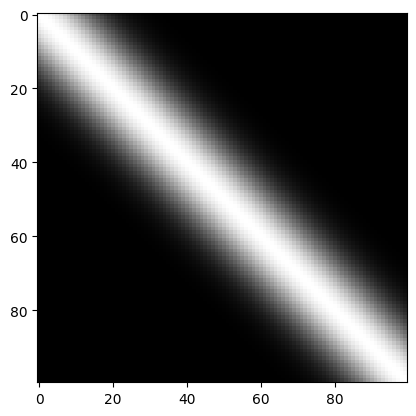

In [520]:
A = convolution_matrix(100)
plt.imshow(A, cmap='gray')

### Part e

In [521]:
def svd(A):
    u, s, vt = np.linalg.svd(A, full_matrices=True)
    return u, s, vt

In [522]:
u, s, vt = svd(A)
print(((u * s) @ vt - A < 1e-12).all())

True


### Part f

In [523]:
def pseudoinverse(A, alpha=1e-8):

    u, s, vt = svd(A)
    q = np.zeros(s.shape)
    q[(s>alpha)|(s<-alpha)] = 1.
    si = q / s
    Wi = np.diag(si)
    W = np.diag(s)
    assert (Wi @ W - np.identity(W.shape[0]) < 1e-12).all()
    assert (W @ Wi - np.identity(W.shape[0]) < 1e-12).all()

    return vt.T @ Wi @ u.T

In [524]:
n = 10
A = convolution_matrix(n)
Ai = pseudoinverse(A)
print((Ai @ A - np.identity(A.shape[0]) < 1e-12).all())
print((A @ Ai - np.identity(A.shape[0]) < 1e-12).all())

True
True


### Part g

`n = 20`

In [525]:
n = 20
A = convolution_matrix(n)
Ai = pseudoinverse(A, alpha=1e-12)
print((Ai @ A - np.identity(A.shape[0]) < 1e-12).all())
print((A @ Ai - np.identity(A.shape[0]) < 1e-12).all())

False
False


`n = 100`

In [526]:
n = 100
A = convolution_matrix(n)
Ai = pseudoinverse(A, alpha=1e-12)
print((Ai @ A - np.identity(A.shape[0]) < 1e-12).all())
print((A @ Ai - np.identity(A.shape[0]) < 1e-12).all())

False
False


In [527]:
u, s, vt = svd(A)
v = vt.T

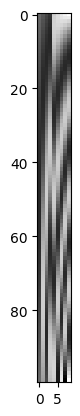

In [528]:
plt.imshow(v[:, :9], cmap='gray')

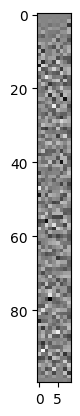

In [529]:
plt.imshow(v[:, -9:], cmap='gray')

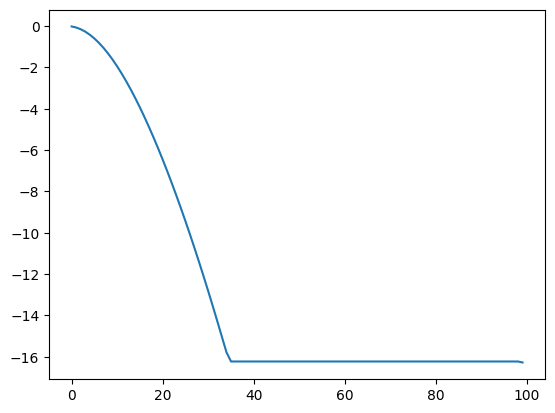

In [530]:
plt.plot(np.log10(s))
plt.show()

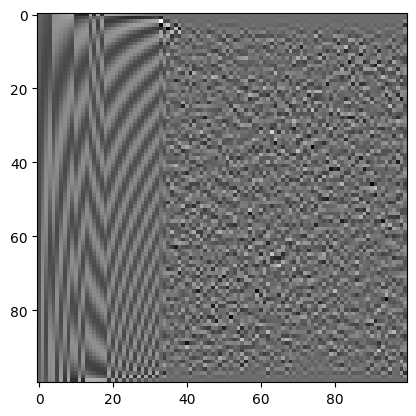

In [531]:
plt.imshow(v, cmap='gray')

## 3. Convolutions and Fourier transform 

### Part a

In [532]:
def X(x, a, b):

    xc = x.copy()
    idx = (a<x)&(x<=b)
    xc[idx] = 1
    xc[~idx] = 0

    return xc

def f(x):
    return X(x, -0.95, -0.6) + 0.2 * X(x, -0.6, -0.2) - 0.5 * X(x, -0.2, 0.2) + 0.7 * X(x, 0.4, 0.6) - 0.7 * X(x, 0.6, 1)

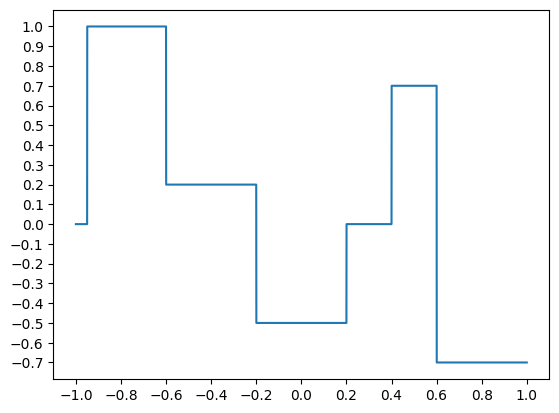

In [533]:
x = np.linspace(-1., 1., num=10000)
plt.plot(x, f(x))
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
plt.show()

### Part b

In [534]:
A005 = convolution_matrix(100, 0, 0.05)
A01 = convolution_matrix(100, 0, 0.1)
A02 = convolution_matrix(100, 0, 0.2)

$\sigma = 0.05$

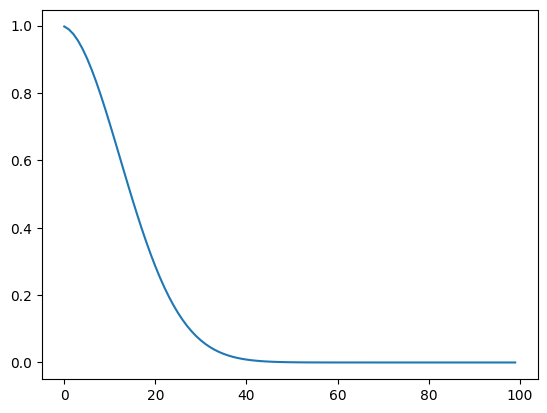

In [535]:
u, s, vt = svd(A005)
plt.plot(s)
plt.show()

$\sigma = 0.1$

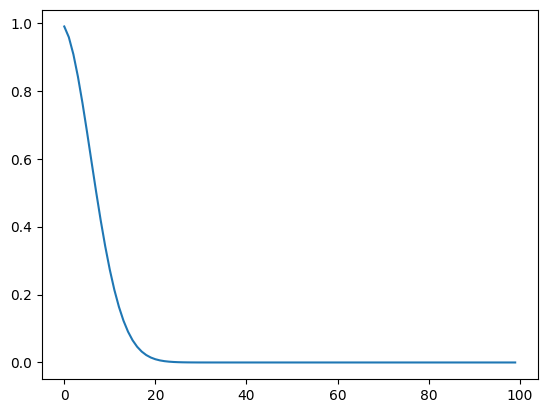

In [536]:
u, s, vt = svd(A01)
plt.plot(s)
plt.show()

$\sigma = 0.2$

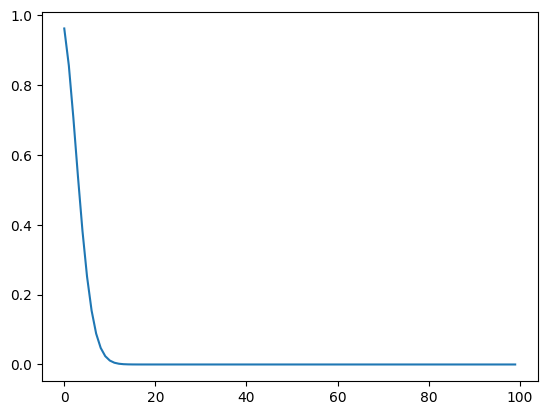

In [537]:
u, s, vt = svd(A02)
plt.plot(s)
plt.show()

### Part c

$\sigma = 0.05$

variance: 0.400082


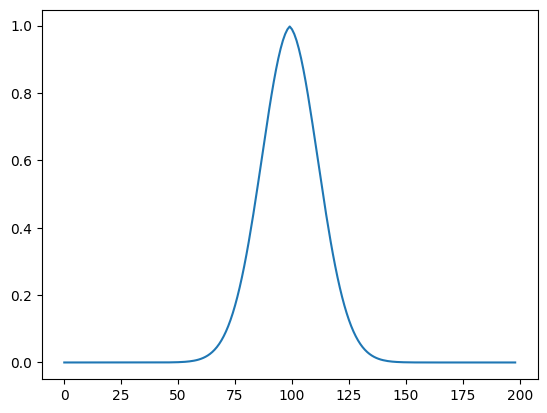

In [538]:
u, s, vt = svd(A005)
sig_est = 1. / (s[0] * np.sqrt(2. * np.pi))
print('variance: %f' % sig_est)
fs = s[::-1]
plt.plot(np.hstack((fs[:-1], s)))
plt.show()

$\sigma = 0.1$

variance: 0.403275


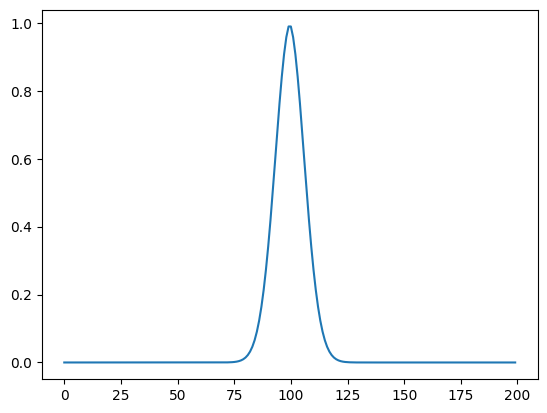

In [539]:
u, s, vt = svd(A01)
sig_est = 1. / (s[0] * np.sqrt(2. * np.pi))
print('variance: %f' % sig_est)
fs = s[::-1]
plt.plot(np.hstack((fs, s)))
plt.show()

$\sigma = 0.2$

variance: 0.414747


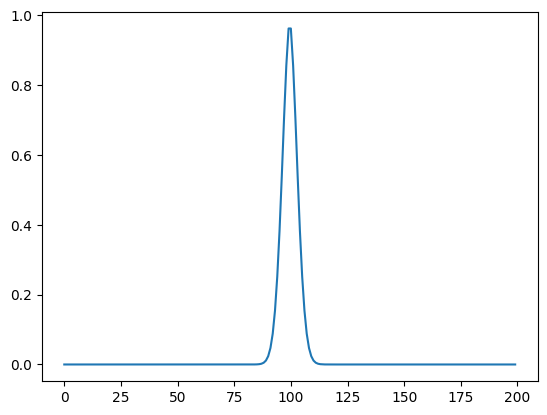

In [540]:
u, s, vt = svd(A02)
sig_est = 1. / (s[0] * np.sqrt(2. * np.pi))
print('variance: %f' % sig_est)
fs = s[::-1]
plt.plot(np.hstack((fs, s)))
plt.show()

### Part d

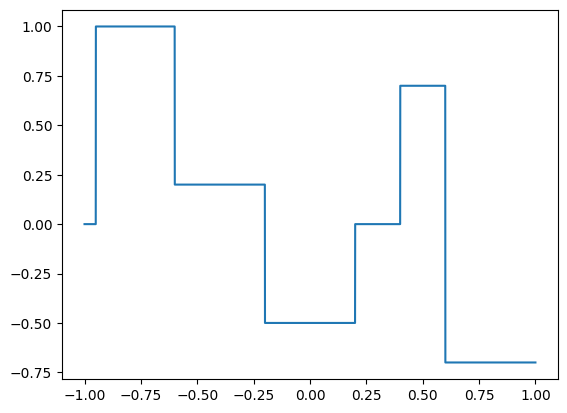

In [541]:
n = 10000
x = np.linspace(-1., 1., num=n)
plt.plot(x, f(x))
plt.show()

$\sigma = 0.05$

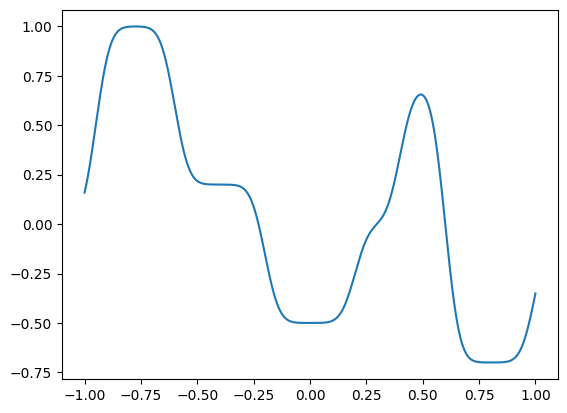

In [542]:
n = 10000
x = np.linspace(-1., 1., num=n)
fx = f(x)
A005 = convolution_matrix(n, 0, 0.05)
by = A005 @ fx
plt.plot(x, by)
plt.show()

$\sigma = 0.1$

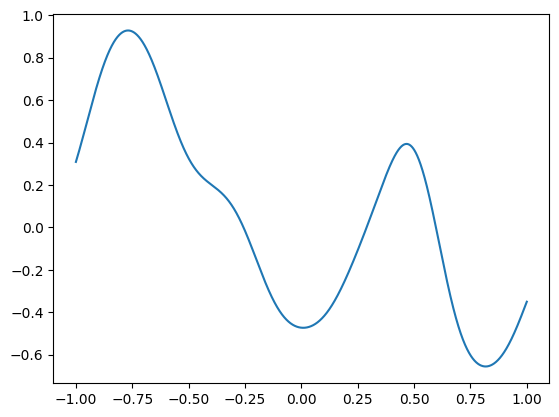

In [543]:
n = 10000
x = np.linspace(-1., 1., num=n)
fx = f(x)
A01 = convolution_matrix(n, 0, 0.1)
by = A01 @ fx
plt.plot(x, by)
plt.show()

$\sigma = 0.2$

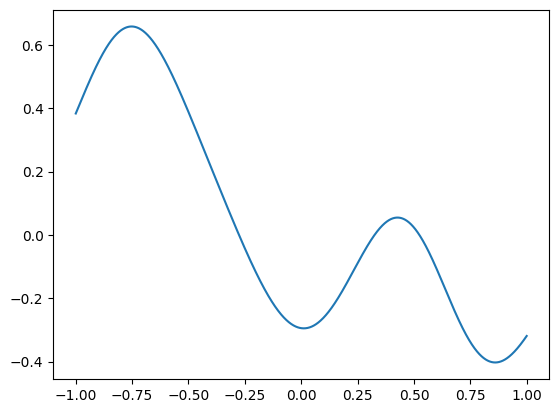

In [544]:
n = 10000
x = np.linspace(-1., 1., num=n)
fx = f(x)
A02 = convolution_matrix(n, 0, 0.2)
by = A02 @ fx
plt.plot(x, by)
plt.show()

### Part e

In [545]:
def conv1D(m, filter):
    m_feq = np.fft.fft(m)
    filter_feq = np.fft.fft(filter, m.shape[0])
    return np.fft.ifft(m_feq * filter_feq).real

$\sigma = 0.05$

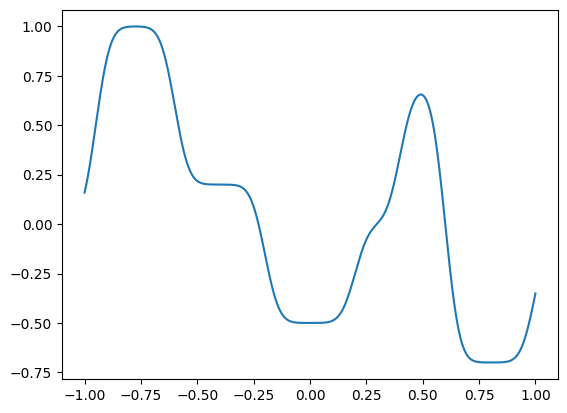

In [546]:
n = 10000
x = np.linspace(-1., 1., num=n)
fx = f(x)
A005 = convolution_matrix(n, 0, 0.05)
z = np.hstack((A005[:, 0], np.zeros((1,)), A005[0, ::-1][:-1]))
by = conv1D(np.hstack((fx, np.zeros((n,)))), z)[:n]
plt.plot(x, by)
plt.show()

$\sigma = 0.1$

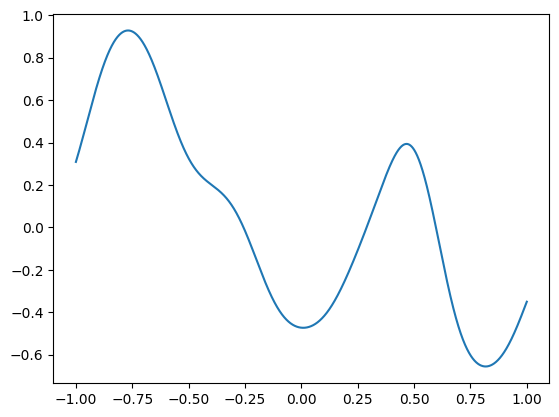

In [547]:
n = 10000
x = np.linspace(-1., 1., num=n)
fx = f(x)
A01 = convolution_matrix(n, 0, 0.1)
z = np.hstack((A01[:, 0], np.zeros((1,)), A01[0, ::-1][:-1]))
by = conv1D(np.hstack((fx, np.zeros((n,)))), z)[:n]
plt.plot(x, by)
plt.show()

$\sigma = 0.2$

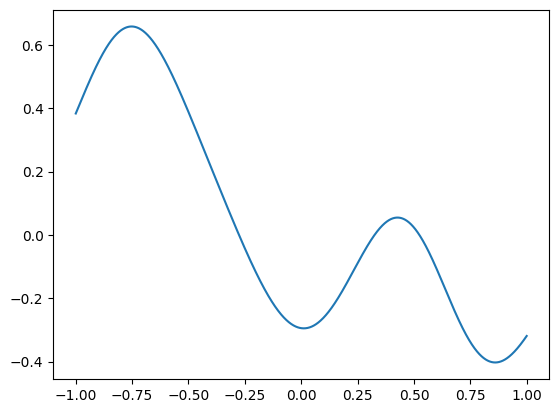

In [548]:
n = 10000
x = np.linspace(-1., 1., num=n)
fx = f(x)
A02 = convolution_matrix(n, 0, 0.2)
z = np.hstack((A02[:, 0], np.zeros((1,)), A02[0, ::-1][:-1]))
by = conv1D(np.hstack((fx, np.zeros((n,)))), z)[:n]
plt.plot(x, by)
plt.show()

### Part f

In [549]:
def convolution_matrix_toeplitz(n, mu=0., sig=0.2):
    x = spatial_grid(n)
    xc = x - x[0]
    xr = -xc.copy()
    return toeplitz(gaussian_func(xc, n, mu, sig), gaussian_func(xr, n, mu, sig))

$\sigma = 0.05$

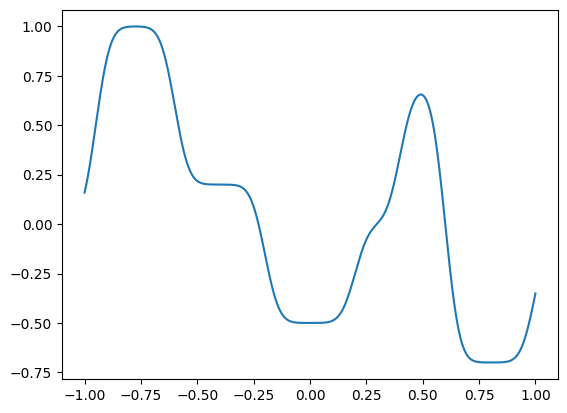

In [550]:
n = 10000
x = np.linspace(-1., 1., num=n)
fx = f(x)
A005 = convolution_matrix_toeplitz(n, 0, 0.05)
z = np.hstack((A005[:, 0], np.zeros((1,)), A005[0, ::-1][:-1]))
by = conv1D(np.hstack((fx, np.zeros((n,)))), z)[:n]
plt.plot(x, by)
plt.show()

$\sigma = 0.1$

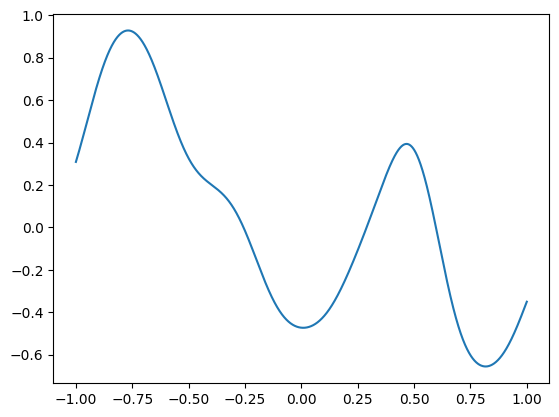

In [551]:
n = 10000
x = np.linspace(-1., 1., num=n)
fx = f(x)
A01 = convolution_matrix_toeplitz(n, 0, 0.1)
z = np.hstack((A01[:, 0], np.zeros((1,)), A01[0, ::-1][:-1]))
by = conv1D(np.hstack((fx, np.zeros((n,)))), z)[:n]
plt.plot(x, by)
plt.show()

$\sigma = 0.2$

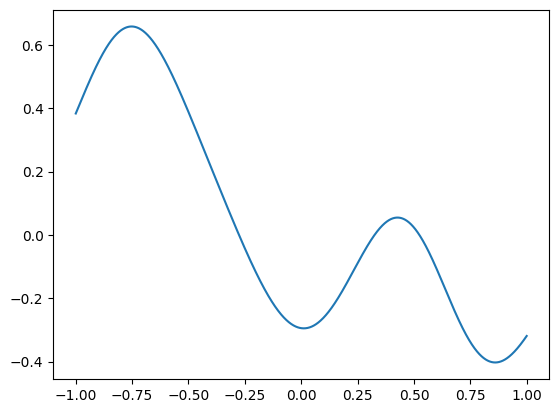

In [552]:
n = 10000
x = np.linspace(-1., 1., num=n)
fx = f(x)
A02 = convolution_matrix_toeplitz(n, 0, 0.2)
z = np.hstack((A02[:, 0], np.zeros((1,)), A02[0, ::-1][:-1]))
by = conv1D(np.hstack((fx, np.zeros((n,)))), z)[:n]
plt.plot(x, by)
plt.show()